In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, to_rgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [3]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [4]:
dataset = pd.DataFrame(data=iris.data, columns=iris.feature_names)
dataset['target'] = iris.target
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [7]:
dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

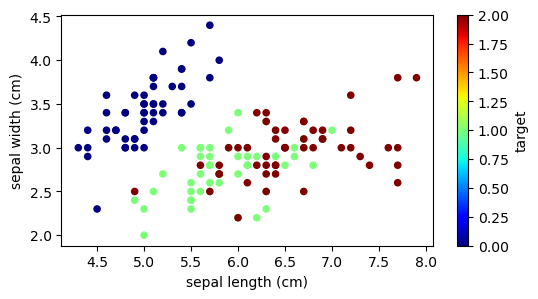

In [8]:
dataset.plot(kind='scatter', x=iris.feature_names[0], y=iris.feature_names[1], c='target', cmap=plt.get_cmap('jet'), colorbar=True, figsize=[6, 3])

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

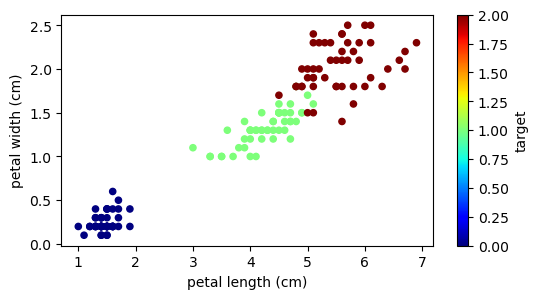

In [9]:
dataset.plot(kind='scatter', x=iris.feature_names[2], y=iris.feature_names[3], c='target', cmap=plt.get_cmap('jet'), colorbar=True, figsize=[6, 3])

In [10]:
dataset.corr()['target'].sort_values(ascending=False)

target               1.000000
petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)    -0.426658
Name: target, dtype: float64

In [11]:
train_set, test_set = train_test_split(dataset, test_size=0.2, stratify=dataset['target'], random_state=42)

In [12]:
train_set['target'].value_counts()/len(train_set)

target
0    0.333333
2    0.333333
1    0.333333
Name: count, dtype: float64

In [13]:
test_set['target'].value_counts()/len(test_set)

target
0    0.333333
2    0.333333
1    0.333333
Name: count, dtype: float64

In [14]:
X_train, X_test = train_set.drop('target', axis=1), test_set.drop('target', axis=1)
y_train, y_test = train_set['target'], test_set['target']

In [15]:
model = DecisionTreeClassifier(random_state=42, )
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9333333333333333

In [16]:
params = [
    {
    'max_depth':[2, 3, 4, 5, 6],
    'max_leaf_nodes':[2, 3, 4, 5, 6]
    }
]

In [17]:
model = DecisionTreeClassifier()
grid_search = GridSearchCV(model, params, cv=3, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [2, 3, 4, 5, 6],
                          'max_leaf_nodes': [2, 3, 4, 5, 6]}],
             verbose=1)

In [18]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4)

In [19]:
grid_search.best_score_

0.9583333333333334

In [20]:
best_model = grid_search.best_estimator_
best_model.score(X_test, y_test)

0.9666666666666667

In [21]:
y_pred = best_model.predict(X_test)
cm_total = confusion_matrix(y_test, y_pred)

precision = np.diag(cm_total) / np.sum(cm_total, axis=0)
recall = np.diag(cm_total) / np.sum(cm_total, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision per class:", precision)
print("Recall per class:", recall)
print("F1 score per class:", f1_score)

Precision per class: [1.         1.         0.90909091]
Recall per class: [1.  0.9 1. ]
F1 score per class: [1.         0.94736842 0.95238095]


In [22]:
cm_total

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]], dtype=int64)

In [23]:
predictions_dataset = dataset.copy()
preds = best_model.predict(dataset.drop('target', axis=1))
predictions_dataset['pred'] = preds
predictions_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pred
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


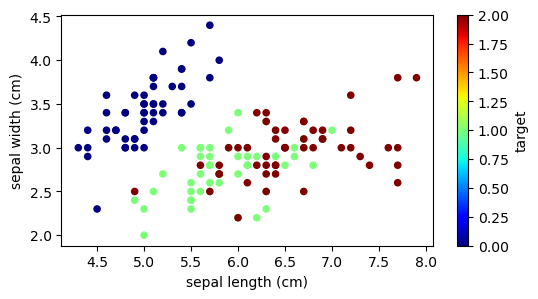

In [25]:
predictions_dataset.plot(kind='scatter', x=iris.feature_names[0], y=iris.feature_names[1], c='target', cmap=plt.get_cmap('jet'), colorbar=True, figsize=[6, 3])
plt.show()

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

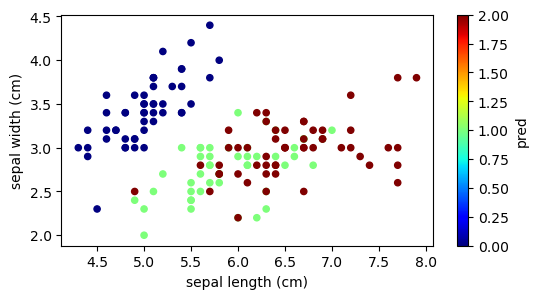

In [26]:
predictions_dataset.plot(kind='scatter', x=iris.feature_names[0], y=iris.feature_names[1], c='pred', cmap=plt.get_cmap('jet'), colorbar=True, figsize=[6, 3])

In [28]:
X_iris = dataset[["petal length (cm)", "petal width (cm)"]].values
y_iris = dataset['target']

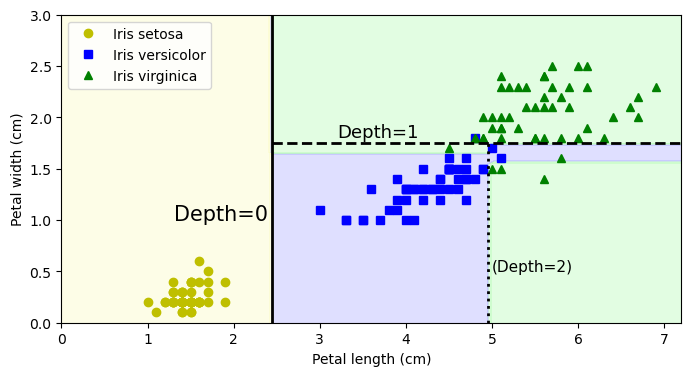

In [29]:
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X_iris, y_iris)

custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(8, 4))

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

# extra code – this section beautifies and saves Figure 6–2
tree_clf_deeper = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])
plt.legend()

plt.show()